In [ ]:
## Import Libraries

In [1]:
import numpy as np
import math
import time
import pymongo
import pandas as pd
import concurrent.futures
import matplotlib.pyplot as plt
import statistics
import numpy as np


In [ ]:
## Connect with mongoDb to extract data(High, low, Close, Open, Volume, Date) of stocks

In [2]:
client = pymongo.MongoClient('mongodb://127.0.0.1:27017/')
mydb = client['Algorithmic_Trading']
info = mydb.historical_data_500

symbols = []
for i in info.find():
    symbols.append(i['Symbol'])
    
all_highs = {}
all_lows = {}
all_closes = {}
all_dates = {}
for s in symbols:
    for i in info.find({"Symbol" : s}):
        high = []
        low = []
        closes = []
        dates = []
        for x in i["Data"]:
            high.append(x["High"])
            low.append(x["Low"])
            closes.append(x["Close"])
            dates.append(x["Date"])
            
            
            
    all_highs[s] = high
    all_lows[s] = low
    all_closes[s] = closes
    all_dates[s] = dates     


['POWERINDIA',
 'AAVAS',
 'ADANITRANS',
 'ABCAPITAL',
 'ATGL',
 'ABBOTINDIA',
 '3MINDIA',
 'ADVENZYMES',
 'AUBANK',
 'AFFLE',
 'ADANIGREEN',
 'ADANIPORTS',
 'ABFRL',
 'APLAPOLLO',
 'AARTIDRUGS',
 'AEGISCHEM',
 'AIAENG',
 'ABB',
 'ACC',
 'ALKEM',
 'APLLTD',
 'ANGELBRKG',
 'ADANIENT',
 'ANURAS',
 'AJANTPHARM',
 'ALEMBICLTD',
 'AARTIIND',
 'ALKYLAMINE',
 'AMARAJABAT',
 'AMBER',
 'ASTERDM',
 'AMBUJACEM',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASAHIINDIA',
 'ASHOKA',
 'BSE',
 'ALOKINDS',
 'DMART',
 'ASTRAZEN',
 'ASIANPAINT',
 'AVANTIFEED',
 'ASHOKLEY',
 'ASTRAL',
 'BAJAJCON',
 'ATUL',
 'BAJAJ-AUTO',
 'BASF',
 'AXISBANK',
 'BAJAJELEC',
 'BEML',
 'BANDHANBNK',
 'AUROPHARMA',
 'BALAMINES',
 'BAJAJHLDNG',
 'BANKINDIA',
 'MAHABANK',
 'BALKRISIND',
 'BAJAJFINSV',
 'BDL',
 'BAYERCROP',
 'BERGEPAINT',
 'BATAINDIA',
 'BANKBARODA',
 'BALRAMCHIN',
 'BAJFINANCE',
 'BHARTIARTL',
 'BEL',
 'BPCL',
 'BIOCON',
 'BURGERKING',
 'BHARATFORG',
 'BHARATRAS',
 'BLUESTARCO',
 'BLUEDART',
 'BIRLACORPN',
 'BSOFT',
 'CSBBAN

In [ ]:
## Aroon Indicator Calculation Blueprint

In [5]:

High_data = all_highs[s][-100:]
n = 14
ans = []
for i in range(0,len(High_data) - n):
    sample = High_data[i:i+n+1]
    x = np.argmax(sample)
    aroon = ((n-(n-x))/n)*100
    ans.append(aroon)

Low_data = all_lows[s][-100:]
ans2 = []
for i in range(0,len(Low_data) - n):
    sample = Low_data[i:i+n+1]
    x = np.argmin(sample)
    aroon = ((n-(n-x))/n)*100
    ans2.append(aroon)


In [ ]:
##Backtesting strategy by setting parameters

In [4]:
s = 'APLAPOLLO'
n = 15
High_data = all_highs[s]
aroon_up = []


for i in range(0,len(High_data) - n):
    sample = High_data[i:i+n+1]
    x = np.argmax(sample)
    aroon = ((n-(n-x))/n)*100
    aroon_up.append(aroon)

Low_data = all_lows[s]
aroon_down = []

for i in range(0,len(Low_data) - n):
    sample = Low_data[i:i+n+1]
    x = np.argmin(sample)
    aroon = ((n-(n-x))/n)*100
    aroon_down.append(aroon)

req_closes = all_closes[s][n:]
req_dates = all_dates[s][n:]

total = 0
i = 1



while i < len(aroon_up):

    if aroon_up[i] > aroon_down[i]:

        j = i+1
        if j>=len(aroon_up):
            break
        else:


            buy_price = req_closes[i-1]

            buy_date = req_dates[i-1]

            while  j < (len(aroon_up) -1) and aroon_up[j] > aroon_down[j]:

                j= j+1

            print(j)

            sell_price = req_closes[j]

            sell_date = req_dates[j]

            result = sell_price - buy_price

            total = total + result

            i = j

            print('Buy-date--', buy_date,'Sell_date--',sell_date , "///// -- OVERALL === ",result,"---BUYING---",buy_price,"->",sell_price)
    else :
        i = i + 1

total1 = 0
i = 1



while i < len(aroon_up):

    if aroon_up[i] < aroon_down[i]:

        j = i+1
        if j>=len(aroon_up):
            break
        else:


            buy_price = req_closes[i-1]

            buy_date = req_dates[i-1]

            while  j < (len(aroon_up) -1) and aroon_down[j] > aroon_up[j]:

                j= j+1

            print(j)

            sell_price = req_closes[j]

            sell_date = req_dates[j]

            result = buy_price - sell_price

            total1 = total1 + result

            i = j

            print('Buy-date--', buy_date,'Sell_date--',sell_date , "///// -- OVERALL === ",result,"---SELLING---",sell_price,"->",buy_price)
    else :
        i = i + 1
        
total_f = total + total1
total_f

7
Buy-date-- 2012-01-04 Sell_date-- 2012-01-12 ///// -- OVERALL ===  -0.6049995422363281 ---BUYING--- 13.824999809265137 -> 13.220000267028809
62
Buy-date-- 2012-01-24 Sell_date-- 2012-04-02 ///// -- OVERALL ===  4.524999618530273 ---BUYING--- 13.645000457763672 -> 18.170000076293945
76
Buy-date-- 2012-04-19 Sell_date-- 2012-04-24 ///// -- OVERALL ===  -1.5599994659423828 ---BUYING--- 18.760000228881836 -> 17.200000762939453
127
Buy-date-- 2012-06-18 Sell_date-- 2012-07-05 ///// -- OVERALL ===  0.1549997329711914 ---BUYING--- 15.244999885559082 -> 15.399999618530273
144
Buy-date-- 2012-07-06 Sell_date-- 2012-07-30 ///// -- OVERALL ===  -0.020000457763671875 ---BUYING--- 15.520000457763672 -> 15.5
164
Buy-date-- 2012-08-14 Sell_date-- 2012-08-29 ///// -- OVERALL ===  -2.0450000762939453 ---BUYING--- 16.600000381469727 -> 14.555000305175781
198
Buy-date-- 2012-09-14 Sell_date-- 2012-10-17 ///// -- OVERALL ===  1.1550006866455078 ---BUYING--- 15.194999694824219 -> 16.350000381469727
227
B

175.14494514465332

In [ ]:
## Finding Optimum value of paramters by backtesting

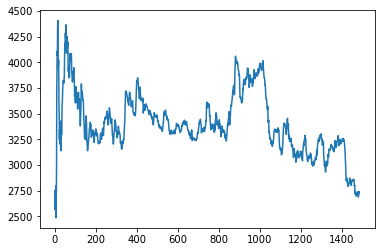

In [16]:
plt.plot(profit_list)

In [13]:
profit_list = []
optimum_value = 0
max_p = 0
s ='ULTRACEMCO'
total_len = len(all_highs[s])

for x in range(1,total_len - 15):
    
    n = 14
    
    while n  < 50 :

        s ='ULTRACEMCO'
        trades = 0

        High_data = all_highs[s:-x]
        aroon_up = []


        for i in range(0,len(High_data) - n):
            sample = High_data[i:i+n+1]
            x = np.argmax(sample)
            aroon = ((n-(n-x))/n)*100
            aroon_up.append(aroon)

        Low_data = all_lows[s:-x]
        aroon_down = []

        for i in range(0,len(Low_data) - n):
            sample = Low_data[i:i+n+1]
            x = np.argmin(sample)
            aroon = ((n-(n-x))/n)*100
            aroon_down.append(aroon)

        req_closes = all_closes[s][n:-x]
        req_dates = all_dates[s][n:-x]

        total = 0
        i = 1



        while i < len(aroon_up):

            if aroon_up[i] > aroon_down[i]:

                trades = trades + 1

                j = i+1
                if j>=len(aroon_up):
                    break
                else:


                    buy_price = req_closes[i-1]

                    buy_date = req_dates[i-1]

                    while  j < (len(aroon_up) -1) and aroon_up[j] > aroon_down[j]:

                        j= j+1



                    sell_price = req_closes[j]

                    sell_date = req_dates[j]

                    result = sell_price - buy_price

                    total = total + result

                    i = j

            else :
                i = i + 1

        total1 = 0
        i = 1



        while i < len(aroon_up):

            if aroon_up[i] < aroon_down[i]:

                trades = trades + 1

                j = i+1
                if j>=len(aroon_up):
                    break
                else:


                    buy_price = req_closes[i-1]

                    buy_date = req_dates[i-1]

                    while  j < (len(aroon_up) -1) and aroon_down[j] > aroon_up[j]:

                        j= j+1



                    sell_price = req_closes[j]

                    sell_date = req_dates[j]

                    result = buy_price - sell_price

                    total1 = total1 + result

                    i = j

            else :
                i = i + 1

        total_f = total + total1
        total_f
        print(total_f , "--",trades)



        if total_f > max_p:
            optimum_value = n
            max_p  = total_f
        n = n+1

        profit_list.append(total_f)
        


11678.10111694336 -- 325
10734.301434326171 -- 299
10156.64901123047 -- 286
9403.399395751954 -- 271
9473.549591064453 -- 257
9999.449188232422 -- 243
9537.897857666016 -- 232
8859.047790527344 -- 222
8536.348706054687 -- 214
7800.699212646485 -- 208
6710.049566650391 -- 200
6013.549353027343 -- 197
5284.649755859375 -- 188
5976.550787353515 -- 183
6512.100134277343 -- 175
5900.9 -- 164
6088.098333740234 -- 158
5623.048773193359 -- 150
5048.8496765136715 -- 146
4674.049841308593 -- 146
4652.048986816406 -- 144
4288.7493347167965 -- 138
3072.000891113281 -- 136
3390.950903320312 -- 136
2569.1995605468746 -- 131
2255.6489624023434 -- 125
2420.198156738281 -- 118
2577.8474792480465 -- 116
3179.5486511230465 -- 116
3684.8992370605465 -- 114
4828.69931640625 -- 110
4812.3491882324215 -- 108
4559.549200439453 -- 104
3985.599523925781 -- 100
3265.199377441406 -- 100
3092.749945068359 -- 98
